In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(303, 14)

# Data contains 

* age - age in years 
* sex - (1 = male; 0 = female) 
* cp - chest pain type 
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
* chol - serum cholestoral in mg/dl 
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg - resting electrocardiographic results 
* thalach - maximum heart rate achieved 
* exang - exercise induced angina (1 = yes; 0 = no) 
* oldpeak - ST depression induced by exercise relative to rest 
* slope - the slope of the peak exercise ST segment 
* ca - number of major vessels (0-3) colored by flourosopy 
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
* target - have disease or not (1=yes, 0=no)

In [3]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
for i in data.columns:
    print(i , pd.unique(data[i]), 'unique_values: ', len(pd.unique(data[i])))

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] unique_values:  41
sex [1 0] unique_values:  2
cp [3 2 1 0] unique_values:  4
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] unique_values:  49
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184

In [6]:
import seaborn as sns

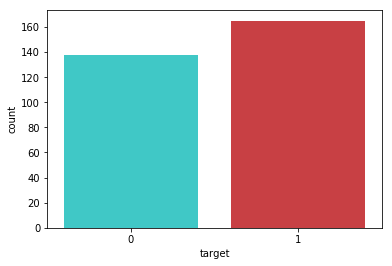

In [7]:
sns.countplot(x="target", data=data, palette=['#29DFDC','#DF292F' ])
plt.show()

In [48]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


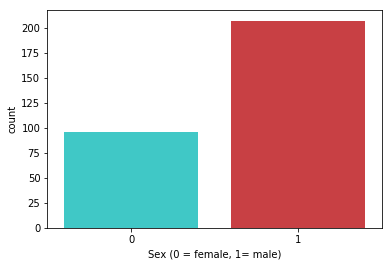

In [8]:
sns.countplot(x='sex', data=data, palette=['#29DFDC','#DF292F' ])
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

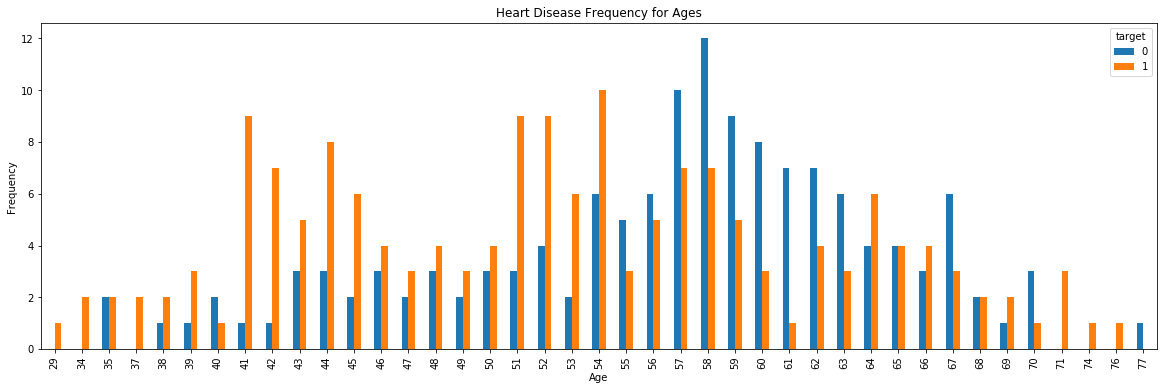

In [9]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

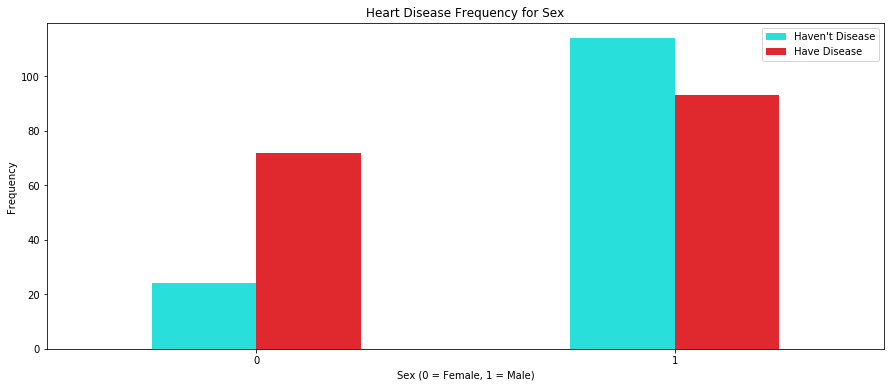

In [10]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#29DFDC','#DF292F' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

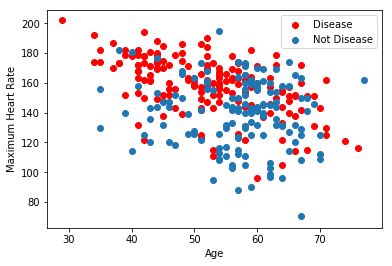

In [11]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

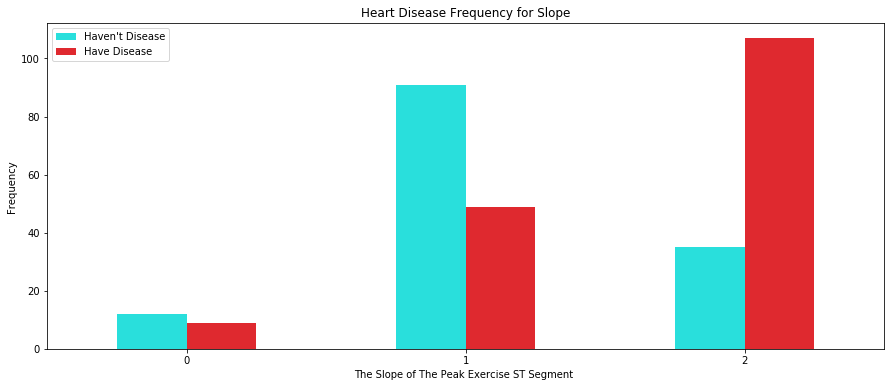

In [12]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#29DFDC','#DF292F' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

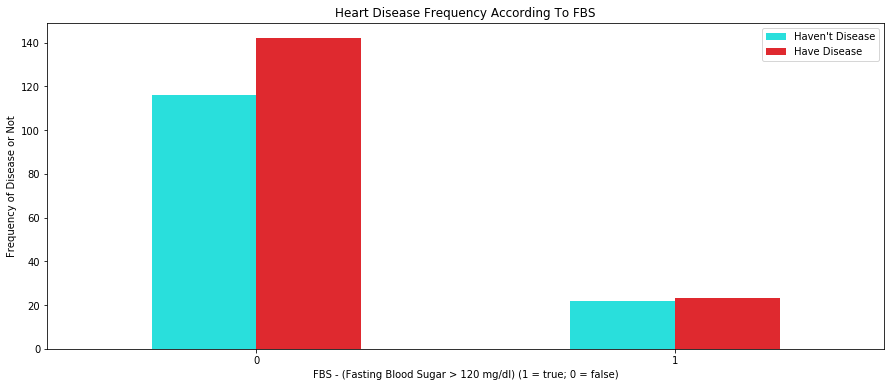

In [13]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#29DFDC','#DF292F' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

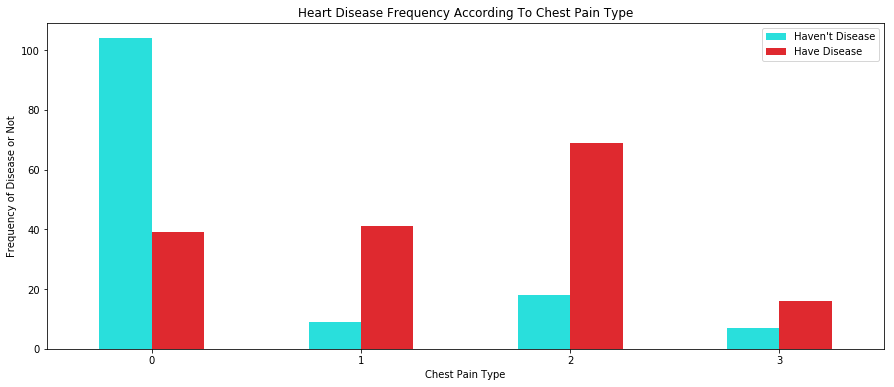

In [14]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#29DFDC','#DF292F' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Features' class
* Countinuous: age, trestbps, chol, thalach, oldpeak
* Categoricial: sex, cp, fbs, restecg, exang, slope, ca, thal


In [15]:
# Dummy the categoricial features with more than 2 values
dummy = ['cp', 'restecg', 'slope', 'ca', 'thal']

In [16]:
data_dummy = pd.get_dummies(data,  prefix = dummy, columns=dummy)

In [17]:
data_dummy.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [18]:
data_dummy.isnull().sum()

age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
target       0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
restecg_0    0
restecg_1    0
restecg_2    0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
dtype: int64

In [19]:
X = data_dummy.drop(['target'],axis = 1)
y = data_dummy.target

In [20]:
print(X.shape)
print(y.shape)

(303, 27)
(303,)


In [21]:
Countinuous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [22]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [23]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)

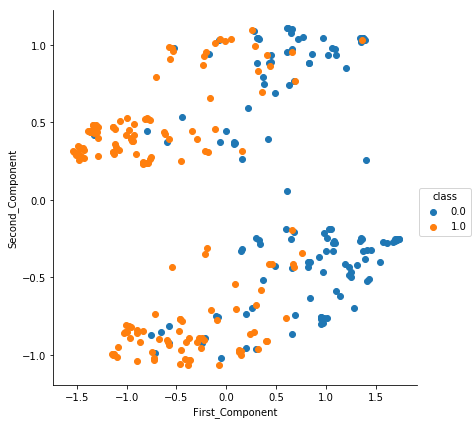

In [25]:
# Attach the label for each 2-d data point
# Just try to visualize it with 2 classes
X_pca = np.vstack((X_pca.T, y)).T

df_pca = pd.DataFrame(X_pca, columns=['First_Component',
                                      'Second_Component',
                                      'class'])
sns.FacetGrid(data=df_pca, hue='class', size=6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend();

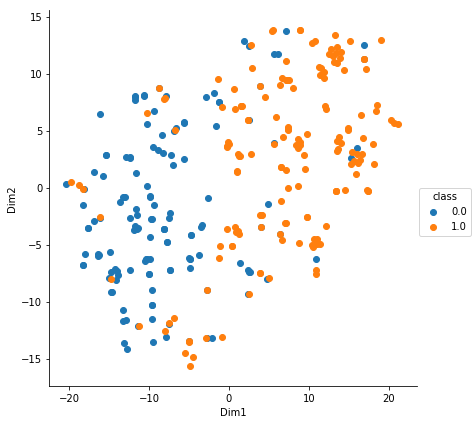

In [26]:
# same purpose with pca, but using TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

X_tsne = tsne.fit_transform(X_scaled)
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])

# Plot the 2 components from t-SNE
sns.FacetGrid(df_tsne, hue='class', size=6)\
   .map(plt.scatter, 'Dim1', 'Dim2')\
   .add_legend();

# Model Selecting

In [27]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [50]:
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naives Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

]

In [62]:
# Using k-fold=10 cross-validation to choose best ML Algorithm
from sklearn.model_selection import ShuffleSplit, cross_validate

# Run the model 10x with 70/20 split intentionally leaving out 10% of the data
cv_split = ShuffleSplit(n_splits=10, test_size=.2, train_size = .7, random_state=0)

# Create table to compare MLA metrices
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Test Accuracy Mean', 
               'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

# Create table to compare MLA Predictions
MLA_predict = {}

# Index through MLA and save performance to table
for row_idx, alg in enumerate(MLA):
    # Set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_idx, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_idx, 'MLA Parameters'] = str(alg.get_params())
    
    # Score model with cross validation
    cv_results = cross_validate(alg, X_scaled, y.astype('int'), cv=cv_split)
    
    MLA_compare.loc[row_idx, 'MLA Time'] = cv_results['fit_time'].mean()
    # MLA_compare.loc[row_idx, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean() 
    MLA_compare.loc[row_idx, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    
    # If this is a non-bias random sample, then +/-3 standard deviations from the mean
    # should statistically capture 99.7% of the subsets.
    MLA_compare.loc[row_idx, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    # Save MLA predictions
    alg.fit(X_scaled, y.astype('int'))
    MLA_predict[MLA_name] = alg.predict(X_scaled)
    
# Print and Sort table.
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False,
                       inplace=True)
MLA_compare

/Users/yuxiaopeng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/yuxiaopeng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(se

/Users/yuxiaopeng/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yuxiaopeng/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yuxiaopeng/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yuxiaopeng/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yuxiaopeng/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/yuxiaopeng/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.872131,0.0874249,0.139055
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.868852,0.109971,0.009077
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.863934,0.164662,0.00103254
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.863934,0.0824413,0.00189714
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.860656,0.118951,0.00209758
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.859016,0.0988512,0.00811317
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.857377,0.130212,0.00178206
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.857377,0.10091,0.00762382
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.84918,0.102692,0.00139589
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.836066,0.145892,0.0109241


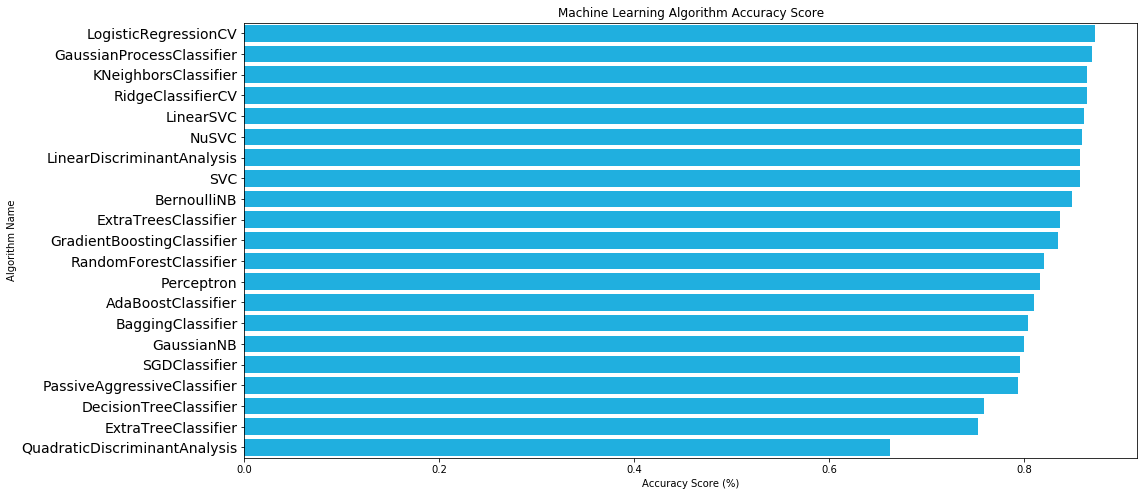

In [63]:
plt.figure(figsize=(16, 8))
base_color = sns.color_palette()[1]
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color='deepskyblue')
plt.title('Machine Learning Algorithm Accuracy Score')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm Name')
plt.rc('ytick', labelsize=14)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

* Select best parameters

In [32]:
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 100)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [33]:
lr = LogisticRegression()
clf = GridSearchCV(lr, hyperparameters, cv=10, verbose=0)

In [34]:
best_model = clf.fit(X_scaled, y)

In [35]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 7.054802310718643


In [39]:
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.20)
lr = LogisticRegression(penalty = 'l1', C =7.054802310718643)
lr.fit(train_X, train_y)
lrPred = lr.predict(test_X)
acc = accuracy_score(test_y, lrPred)
print(acc)

0.9180327868852459


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import itertools

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 89  21]
 [ 13 119]]
Accuracy: 0.859504132231405


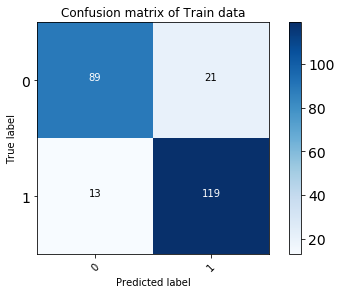

In [42]:
# Train data CM
lrPred1 = lr.predict(train_X)
lr_matrix1 = metrics.confusion_matrix(train_y, lrPred1)
plt.figure()
plot_confusion_matrix(lr_matrix1, classes=['0','1'],
                      title='Confusion matrix of Train data')
print('Accuracy:', accuracy_score(train_y, lrPred1))

[[24  4]
 [ 1 32]]
Accuracy: 0.9180327868852459


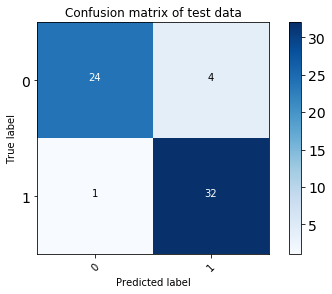

In [43]:
# Test data CM
lr_matrix = metrics.confusion_matrix(test_y, lrPred)
plt.figure()
plot_confusion_matrix(lr_matrix, classes=['0','1'],
                      title='Confusion matrix of test data')
print('Accuracy:', accuracy_score(test_y, lrPred))

In [44]:
from sklearn.metrics import roc_curve, auc  

probas_=lr.predict_proba(X_scaled)
fpr, tpr, thresholds = roc_curve(y, probas_[:, 1]) 
auc(fpr, tpr)  

0.9417215634606939

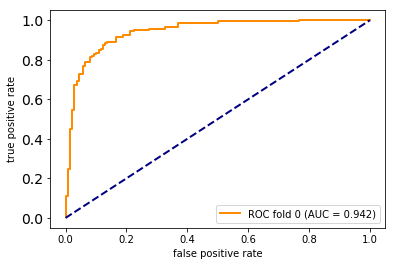

In [45]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC fold %d (AUC = %0.3f)' % (0,auc(fpr, tpr) )) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

In [92]:
probas = lr.predict_proba(test_X)

In [93]:
probas[0]

array([0.99787614, 0.00212386])

In [94]:
print('The probability of the heart disease for the patient is' , probas[0][1]*100, '%')

The probability of the heart disease for the patient is 0.2123863666294102 %
